In [33]:
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt, farid
from skimage import img_as_float, img_as_ubyte

import matplotlib.pyplot as plt

import cv2
import numpy as np

# Roberts filter
To perform edge detection with the Roberts operator we first convolve the orgiganl image, with the following two kernels:
$$
\begin{bmatrix}
    1 & 0\\
    0 & -1
\end{bmatrix} \quad 
\begin{bmatrix}
    0 & 1\\
    -1 & 0
\end{bmatrix}
$$

Let $I(x, y)$ be a point of the original image and $G_x(x, y)$ be a point in an image formed by convolving with the first kernel and $G_y(x, y)$ be a point in an image formed by convolving with the second kernel. The gradient can than be defined as:
$$\nabla I(x, y) = G(x, y) = \sqrt{G_x^2 + G_y^2}$$
this value is used as an new pixel value.

All other filters share the same idea (but I'm not sure about `farid`) the main difference is in the kernels that used.

In [10]:
img = img_as_float(io.imread("../inpdata/images/sandstone.tif"))

In [14]:
rob_img = roberts(img)
sob_img = sobel(img)
sch_img = scharr(img)
pre_img = prewitt(img)
far_img = farid(img)

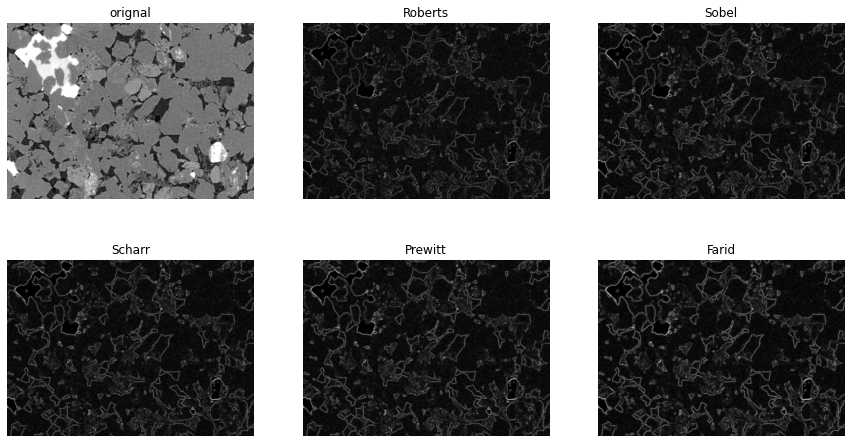

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

imgs = (img, rob_img, sob_img, sch_img, pre_img, far_img)
names = ("orignal", "Roberts", "Sobel", "Scharr", "Prewitt", "Farid")

for i, cur_img in enumerate(imgs):
    axs.flatten()[i].imshow(cur_img, cmap = "gray")
    axs.flatten()[i].title.set_text(names[i])
    axs.flatten()[i].axis("off")

# Canny edge detection filter
The process of Canny edge detection algorithm can be broken down to five different steps:
- Apply Gaussian filter to smooth the image in order to remove the noise
- Find the intensity gradients of the image
- Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
- Apply double threshold to determine potential edges
- Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

In [25]:
img

array([[0.47058824, 0.50980392, 0.54117647, ..., 0.27058824, 0.28627451,
        0.23921569],
       [0.46666667, 0.4745098 , 0.49019608, ..., 0.25098039, 0.27843137,
        0.23921569],
       [0.50980392, 0.49803922, 0.48627451, ..., 0.22352941, 0.23529412,
        0.27058824],
       ...,
       [0.56078431, 0.52941176, 0.54509804, ..., 0.50980392, 0.51764706,
        0.5254902 ],
       [0.56078431, 0.57254902, 0.57254902, ..., 0.49411765, 0.52156863,
        0.52941176],
       [0.5372549 , 0.56862745, 0.55294118, ..., 0.50196078, 0.52941176,
        0.49803922]])

(-0.5, 673.5, 480.5, -0.5)

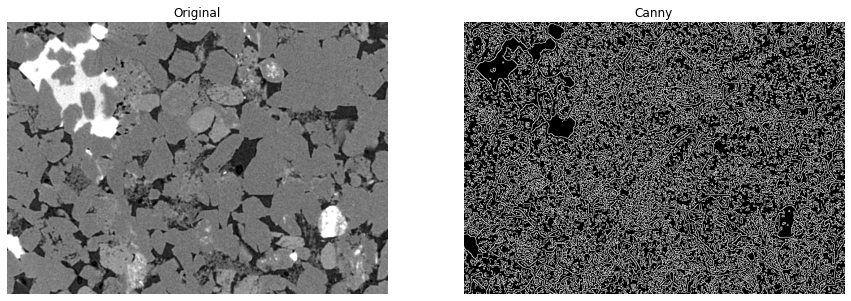

In [32]:
can_img = cv2.Canny(img_as_ubyte(img), 50, 80)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axs[0].imshow(img, cmap="gray")
axs[0].title.set_text("Original")
axs[0].axis("off")

axs[1].imshow(can_img, cmap="gray")
axs[1].title.set_text("Canny")
axs[1].axis("off")

In [54]:
# actually you can find lower and upper boundaries based on your image
sigma = np.std(img_as_ubyte(img))
low = np.round(max(0, np.median(img_as_ubyte(img)) - 1.0 * sigma))
up = np.round(min(255, np.median(img_as_ubyte(img)) + 2.0 * sigma))
print(low, up)

77.0 203.0


(-0.5, 673.5, 480.5, -0.5)

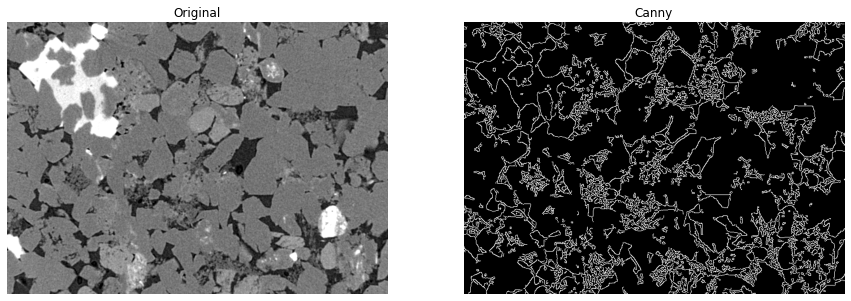

In [55]:
can_img = cv2.Canny(img_as_ubyte(img), low, up)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axs[0].imshow(img, cmap="gray")
axs[0].title.set_text("Original")
axs[0].axis("off")

axs[1].imshow(can_img, cmap="gray")
axs[1].title.set_text("Canny")
axs[1].axis("off")